### Importing packages

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import string
from nltk.corpus import stopwords

### URL

In [2]:
url = 'https://www.amazon.com/Portable-Mechanical-Keyboard-MageGee-Backlit/product-reviews/B098LG3N6R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

### Headers - UserAgent

In [3]:
Headers = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36', 'Accept-Language':'en-US, en;q=0.5'})

### Getting all the reviews

In [4]:
n = 3 #number of pages
all_reviews = []
temp_url = url
for i in range(1,n+1):
    page_no = f"&pageNumber={i}"
    temp_url = temp_url + page_no
    webpage = requests.get(temp_url, headers = Headers)
    soup = BeautifulSoup(webpage.content, "html.parser")
    reviews = soup.find_all("span", attrs={'class':'a-size-base review-text review-text-content', 'data-hook':'review-body'})
    for review in reviews:
        # print(review.text)
        all_reviews.append(review.text.strip())
    # print(page_no, temp_url)
    temp_url = temp_url[:-13]

temp_url = url

### Analysing the reviews(data)

In [5]:
df = pd.DataFrame({'Reviews':all_reviews}) # Create a data frame with the all the reviews

In [6]:
df['word_count'] = df['Reviews'].apply(lambda x: len(x.split())) # Calculate and add the word count of each review

In [7]:
df['char_count'] = df['Reviews'].apply(lambda x: len(x))

In [8]:
def average_words(x):
    words = x.split()
    return sum(len(word) for word in words) / len(words)

In [9]:
df['average_word_length'] = df['Reviews'].apply(lambda x: average_words(x))

In [10]:
stop_words = stopwords.words('english','spanish') # all the words that add no semantic meaning

In [11]:
df['stopword_count'] = df['Reviews'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words])) #add the number of stop words in each review

In [12]:
df['stopword_rate'] = df['stopword_count']/df['word_count']

In [13]:
df.sort_values(by='stopword_rate')

,Reviews,word_count,char_count,average_word_length,stopword_count,stopword_rate
22,normal small mechanical keyboard,4,32,7.250000,0,0.000000
23,Cuando compré el producto no esperaba recibir ...,18,109,5.111111,1,0.055556
20,Apesar de la falla logística el producto se ve...,20,99,4.000000,2,0.100000
9,Tenía curiosidad por tener un teclado mecánico...,72,411,4.722222,9,0.125000
19,"I use this everyday, took sometime to get use ...",19,104,4.526316,5,0.263158
1,I recently purchased the MageGee Portable 60% ...,194,1292,5.664948,65,0.335052
21,"Felt good, sounded good, simple backlit keyboa...",35,189,4.371429,14,0.400000
12,"Not much to really say, it's a keyboard, it wo...",49,283,4.755102,20,0.408163
10,Sometimes needs to be unplugged and plugged ba...,65,363,4.600000,27,0.415385
15,Nice heavy little keyboard. Doesn't feel cheap...,26,147,4.692308,11,0.423077


In [14]:
df.describe()

,word_count,char_count,average_word_length,stopword_count,stopword_rate
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,84.000000,457.600000,4.503253,38.233333,0.417607
std,99.105308,541.504329,0.648635,47.200002,0.153502
min,2.000000,9.000000,3.803922,0.000000,0.000000
25%,26.000000,147.750000,4.110197,11.250000,0.409969
50%,55.000000,309.000000,4.367243,24.000000,0.463559
75%,106.000000,571.000000,4.675028,53.500000,0.517805
max,511.000000,2756.000000,7.250000,236.000000,0.562500


### Data cleaning

##### The new column - 'reviews' starting with the letter small 'r' will be the cleaned data at the end of this section.

In [15]:
df['reviews'] = df['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split())) #convert all words into lowercase

In [16]:
df['reviews'] = df['reviews'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation))) #remove all punctuation marks

In [17]:
def remove_punctuation(x):
    words = x.split()
    res = []
    for word in words:
        clean_word = ""
        for char in word:
            if (ord(char) >= 97 and ord(char) <= 122):
                clean_word += char
        res.append(clean_word)
    return " ".join(res)

In [18]:
df['reviews'] = df['reviews'].apply(lambda x: remove_punctuation(x))

In [19]:
df['reviews'] = df['reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words)) #remove stop words from every review

In [20]:
df

,Reviews,word_count,char_count,average_word_length,stopword_count,stopword_rate,reviews
0,Keyboard seems high quality. Maybe I just don’...,88,457,4.204545,40,0.454545,keyboard seems high quality maybe dont know di...
1,I recently purchased the MageGee Portable 60% ...,194,1292,5.664948,65,0.335052,recently purchased magegee portable mechanical...
2,you get what you pay for with this keyboard. i...,170,903,4.317647,88,0.517647,get pay keyboard doesnt feel cheap thought wou...
3,"Wonderful little keyboard, got it to replace a...",72,395,4.500000,33,0.458333,wonderful little keyboard got replace razer ke...
4,"Amazing keyboard, it is heavy but has no impac...",38,193,4.105263,21,0.552632,amazing keyboard heavy impact since using gami...
5,"This keyboard is nice and what I wanted, but t...",157,842,4.363057,80,0.509554,keyboard nice wanted fn key doesnt work functi...
6,I bought this to free up some room on my small...,68,350,4.161765,32,0.470588,bought free room small desk fits well feels su...
7,It works amazing and is super portable for whe...,37,196,4.324324,18,0.486486,works amazing super portable go trips love but...
8,I am a huge fan of this item. The switches are...,127,641,4.055118,68,0.535433,huge fan item switches wonderful daily driver ...
9,Tenía curiosidad por tener un teclado mecánico...,72,411,4.722222,9,0.125000,tena curiosidad por tener un teclado mecnico l...


In [21]:
pd.Series(" ".join(df['reviews']).split()).value_counts()[:30] # top 30 most used words 

keyboard      43
one           19
keys          16
key           15
use           14
would         11
nice          10
really        10
pretty        10
price         10
gaming        10
good          10
get            9
used           9
sound          9
keyboards      9
mechanical     8
little         8
fn             7
expensive      7
switches       7
back           7
quality        7
great          6
board          6
small          6
feel           6
bought         6
someone        6
im             6
Name: count, dtype: int64

In [22]:
other_stop_words = ['would', 'use', 'get', 'used', 'bought', 'fn', 'someone', 'typing', 'feel', 'back', 'gaming', 'maybe', 'switch', 'doesnt', 'could', 'another', 'red', 'board', 'mechanical'] #define stop words that will not be of any use for sentiment analysis

In [23]:
df['reviews'] = df['reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_words))

In [24]:
pd.Series(" ".join(df['reviews']).split()).value_counts()[:30]

keyboard     43
one          19
keys         16
key          15
pretty       10
price        10
nice         10
really       10
good         10
keyboards     9
sound         9
little        8
expensive     7
switches      7
quality       7
great         6
im            6
small         6
caps          5
like          5
worth         5
fine          5
solid         5
long          5
size          5
que           5
el            5
different     5
dont          5
cheap         5
Name: count, dtype: int64

#### Lemmatization

In [25]:
from textblob import Word

In [26]:
df['reviews'] = df['reviews'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split())) #converst similar words to their base form

### Using the model

In [27]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

#### Instantiate the model from hugging-face

In [28]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

#### Use the tokenizer and calculate the sentiment (example use case)

In [29]:
tokens = tokenizer.encode('This was the best dinner I have had ', return_tensors='pt') #use the tokenizer and set return_tensors to PyTorch

In [30]:
result = model(tokens) #run the model on the tokens

In [31]:
int(torch.argmax(result.logits)+1)

5

#### Using the model to perform sentiment analysis on the reviews from amazon

In [32]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [33]:
df['sentiment_score'] = df['reviews'].apply(lambda x: sentiment_score(x)) #assign a sentiment score to each review

In [34]:
df

,Reviews,word_count,char_count,average_word_length,stopword_count,stopword_rate,reviews,sentiment_score
0,Keyboard seems high quality. Maybe I just don’...,88,457,4.204545,40,0.454545,keyboard seems high quality dont know differen...,3
1,I recently purchased the MageGee Portable 60% ...,194,1292,5.664948,65,0.335052,recently purchased magegee portable keyboard o...,4
2,you get what you pay for with this keyboard. i...,170,903,4.317647,88,0.517647,pay keyboard cheap thought case feel pretty st...,3
3,"Wonderful little keyboard, got it to replace a...",72,395,4.500000,33,0.458333,wonderful little keyboard got replace razer ke...,5
4,"Amazing keyboard, it is heavy but has no impac...",38,193,4.105263,21,0.552632,amazing keyboard heavy impact since using led ...,4
5,"This keyboard is nice and what I wanted, but t...",157,842,4.363057,80,0.509554,keyboard nice wanted key work function ff seem...,3
6,I bought this to free up some room on my small...,68,350,4.161765,32,0.470588,free room small desk fit well feel substantial...,4
7,It works amazing and is super portable for whe...,37,196,4.324324,18,0.486486,work amazing super portable go trip love butto...,5
8,I am a huge fan of this item. The switches are...,127,641,4.055118,68,0.535433,huge fan item switch wonderful daily driver si...,5
9,Tenía curiosidad por tener un teclado mecánico...,72,411,4.722222,9,0.125000,tena curiosidad por tener un teclado mecnico l...,3


### Results

In [35]:
pd.Series(df['sentiment_score']).value_counts().sort_values(ascending=True)

sentiment_score
1    1
2    4
5    7
3    9
4    9
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_1036\2441341494.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=custom_palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1036\2441341494.py:14: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=custom_palette)


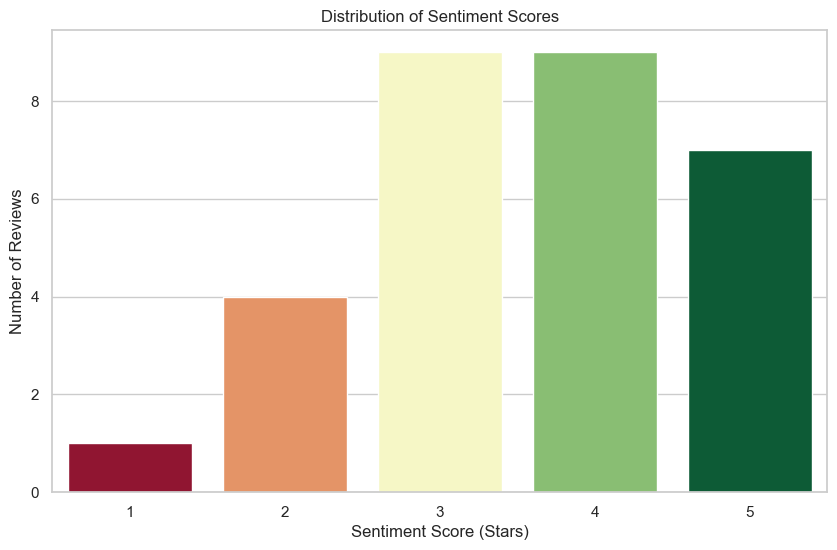

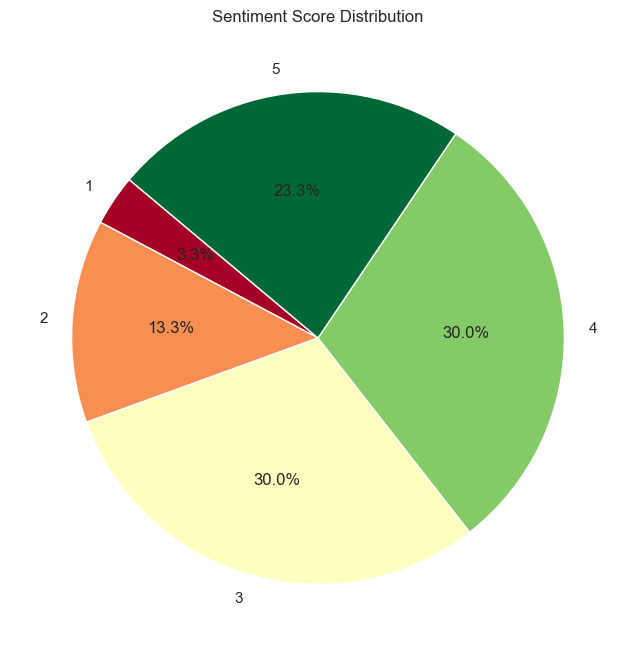

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Count the frequency of each sentiment score
sentiment_counts = df['sentiment_score'].value_counts().sort_index()

# Define a custom color palette where lower scores are red and higher scores are green
custom_palette = sns.color_palette("RdYlGn", as_cmap=True)(np.linspace(0, 1, len(sentiment_counts)))

# Bar Plot for Sentiment Distribution with gradient colors
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=custom_palette)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score (Stars)")
plt.ylabel("Number of Reviews")
plt.show()

# Optional: Pie Chart for Sentiment Distribution with gradient colors
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_palette)
plt.title("Sentiment Score Distribution")
plt.show()
